# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,accuracy_score
import sklearn.cluster as cluster
import sklearn.metrics as metrics

## Load the Data

In [185]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [186]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [188]:
df.shape

(52000, 26)

# As we see above  our data is have 26 columns of datatype object,float64 and int64 and 21593 Rows

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [190]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [191]:
df['Accident_Severity'].head().isnull()

,Accident_Severity
0,False
1,False
2,False
3,False
4,False


In [192]:
df['Number_of_Casualties'].head().isnull()

,Number_of_Casualties
0,False
1,False
2,False
3,False
4,False


In [135]:
df['Light_Conditions'].head().isnull()

,Light_Conditions
0,False
1,False
2,False
3,False
4,False


In [193]:
total_of_null_values = df.isnull().sum().sum()
print("Total of null values:",total_of_null_values)
tatal_of_rows = df.shape[0]
print("Total of all values:",tatal_of_rows)
percentage_of_null_values = (total_of_null_values / tatal_of_rows) * 100
print("Percentage of null values:",percentage_of_null_values,"%")

Total of null values: 1995
Total of all values: 52000
Percentage of null values: 3.8365384615384612 %


# so like we see above because the null values is just 4.12% from all our data and less then 20% we will drop it

In [194]:
df.dropna(inplace=True)

In [195]:
df.shape

(50029, 26)

In [196]:
df.duplicated().sum()

43

# we have for duplicated we will drop it

In [197]:
df.drop_duplicates(inplace=True)

In [198]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [199]:
df_ = df.drop(columns=['Location_Easting_OSGR','Location_Northing_OSGR','Police_Force','Speed_limit','Pedestrian_Crossing-Physical_Facilities','Pedestrian_Crossing-Human_Control','Date','Local_Authority_(Highway)'])

In [202]:
df_ = df_.drop(columns=['Road_Type','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident'])

In [203]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Longitude                   49986 non-null  float64
 1   Latitude                    49986 non-null  float64
 2   Accident_Severity           49986 non-null  float64
 3   Number_of_Vehicles          49986 non-null  int64  
 4   Number_of_Casualties        49986 non-null  float64
 5   Day_of_Week                 49986 non-null  int64  
 6   Local_Authority_(District)  49986 non-null  int64  
 7   1st_Road_Class              49986 non-null  int64  
 8   1st_Road_Number             49986 non-null  int64  
 9   2nd_Road_Class              49986 non-null  int64  
 10  2nd_Road_Number             49986 non-null  int64  
 11  Urban_or_Rural_Area         49986 non-null  float64
 12  Year                        49986 non-null  int64  
dtypes: float64(5), int64(8)
memory usage

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

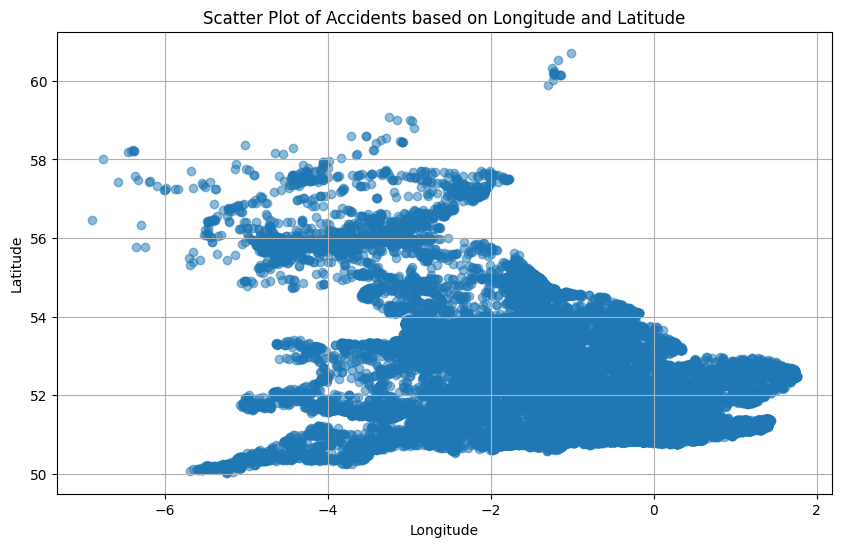

In [204]:
plt.figure(figsize=(10, 6))
plt.scatter(df_['Longitude'], df_['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accidents based on Longitude and Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [229]:
X= df_
y = df_['Accident_Severity']

In [240]:
X_train,X_test,y_train,y_test = train_test_split(df_,df_['Accident_Severity'],test_size=0.2,random_state=42)

In [241]:
interia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10, random_state=0)
    kmeans.fit(X_train)
    interia.append(kmeans.inertia_)

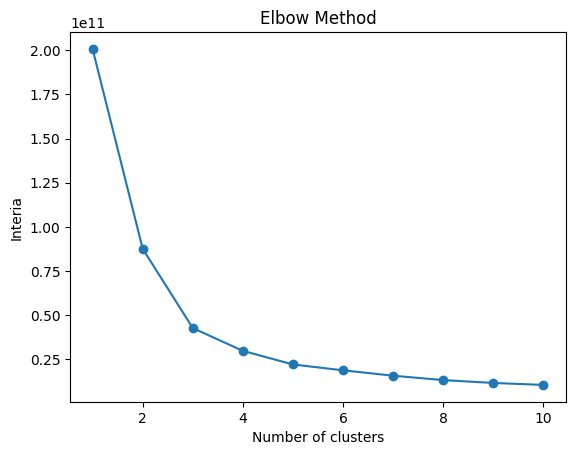

In [242]:
plt.plot(k_range, interia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('Elbow Method')
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [243]:
K_means = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10, random_state=0)
K_means.fit(X_train,y_train)


KMeans(n_clusters=4, n_init=10, random_state=0)

In [255]:
y_pred = K_means.predict(X_test)

In [256]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.03460692138427685


In [257]:
cluster_centers = K_means.cluster_centers_
print(cluster_centers)

[[-1.34679130e+00  5.25996227e+01  2.83763838e+00  1.83289404e+00
   1.35712735e+00  4.11966263e+00  3.49762349e+02  4.13398865e+00
   2.68820242e+02  2.55775373e+00  8.05368228e+01  1.36822847e+00
   2.00938283e+03]
 [-1.86378868e+00  5.24867149e+01  2.82212257e+00  1.82455157e+00
   1.35463378e+00  4.15022422e+00  3.64151158e+02  3.81109865e+00
   4.80831689e+03  2.74607623e+00  6.07062780e+01  1.34659940e+00
   2.00944301e+03]
 [-1.45572160e+00  5.24078400e+01  2.86466942e+00  1.90082645e+00
   1.35227273e+00  4.15909091e+00  3.39109504e+02  4.20144628e+00
   5.06149587e+03  4.52376033e+00  5.26758264e+03  1.22004132e+00
   2.00967355e+03]
 [-1.62064104e+00  5.26636093e+01  2.87244538e+00  1.89781536e+00
   1.36504581e+00  4.18322763e+00  3.26476392e+02  3.69556025e+00
   2.91158562e+02  4.21987315e+00  5.19933615e+03  1.30655391e+00
   2.00935447e+03]]


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
   i drop a lot of unnecessary columns deponding in weather or road conditions because i want know the area that has an accident so this columns not necessarily
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   i choose 4 depand in elbow method
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?